In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import time
import numpy as np

df= pd.read_excel('C:/Users/janro/OneDrive - Universität Bayreuth/5u6Semester/Bachelorarbeit/data.xlsx', index_col=0)
df=df[['filingDate', 'reportDate', 'tone','abnormal_return', 'change', '% negative', 'change_abs'] ]
print(df)

     filingDate reportDate      tone  abnormal_return    change  % negative  \
5    2016-02-19 2015-12-31 -0.269841         0.001050       NaN    1.756104   
4    2017-02-17 2016-12-31 -0.374326         0.011603 -0.387207    2.069257   
3    2018-02-16 2017-12-31 -0.324239         0.002554  0.133805    1.872237   
2    2019-02-22 2018-12-31 -0.302275         0.014488  0.067740    1.774956   
1    2020-02-21 2019-12-31 -0.335570        -0.011255 -0.110149    1.789944   
...         ...        ...       ...              ...       ...         ...   
4409 2021-05-28 2021-03-31 -0.387784        -0.000775  0.010686    2.340849   
4412 2021-02-05 2020-12-31 -0.361415         0.006377       NaN    2.088557   
4413 2021-02-09 2020-12-31 -0.424384        -0.063568       NaN    2.443149   
4415 2020-05-07 2019-12-31 -0.166667        -0.022388       NaN    0.845411   
4414 2021-03-01 2020-12-31 -0.508982        -0.069849 -2.053892    2.897973   

      change_abs  
5            NaN  
4      -0.104

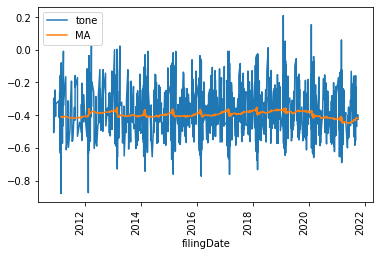

Average tone: -0.3903317957153167
Average tone since March 2020: -0.4236055294597922


In [2]:
df["filingDate"] = pd.to_datetime(df["filingDate"])
df1 = df.sort_values('filingDate', ascending=True)
df1.fillna(0, inplace=True)
df1['MA'] = df1['tone'].rolling(window=100).mean()
df1.plot(x="filingDate", y=["tone", "MA"], kind="line")
plt.xticks(rotation='vertical')
plt.legend(loc='upper left')
plt.show()

print('Average tone:',df['tone'].mean())
df_covid= df.loc[(df['reportDate'] > '2020-03-1')]
print('Average tone since March 2020:', df_covid['tone'].mean())

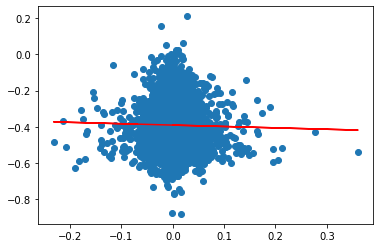

In [3]:
from sklearn.linear_model import LinearRegression
X = df.loc[:, 'abnormal_return'].values.reshape(-1, 1)  # iloc[:, 1] is the column of X
Y = df.loc[:, 'tone'].values.reshape(-1, 1)  # df.iloc[:, 4] is the column of Y
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.xlabel='abnormal return'
plt.ylabel='tone'
plt.plot(X, Y_pred, color='red')
plt.show()

(1642, 7)
-0.2912621359223301


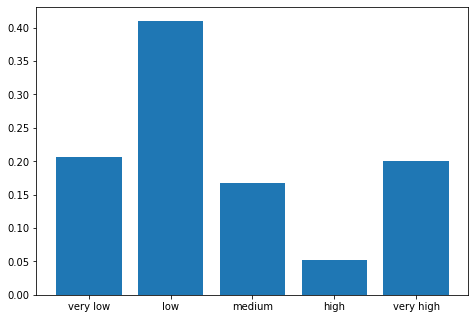

In [4]:
df_vlow= df[df['tone']>df['tone'].quantile(0.1)]
df_low=df[(df['tone']>df['tone'].quantile(0.1)) & (df['tone']<df['tone'].quantile(0.3))]
df_medium=df[(df['tone']>df['tone'].quantile(0.3)) & (df['tone']<df['tone'].quantile(0.7))]
df_high=df[(df['tone']>df['tone'].quantile(0.7)) & (df['tone']<df['tone'].quantile(0.9))]
df_vhigh= df[df['tone']<df['tone'].quantile(0.9)]
print(df_medium.shape)
print(df['tone'].quantile(0.8))
bars=np.array([df_vlow['abnormal_return'].mean(),df_low['abnormal_return'].mean(),df_medium['abnormal_return'].mean(), df_high['abnormal_return'].mean(),df_vhigh['abnormal_return'].mean()])*100
label=['very low', 'low', 'medium', 'high', 'very high']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(label,bars)
plt.show()


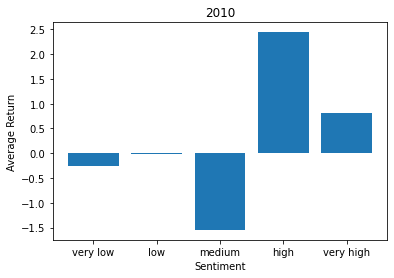

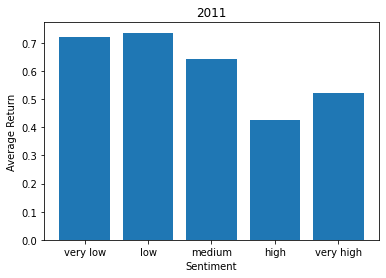

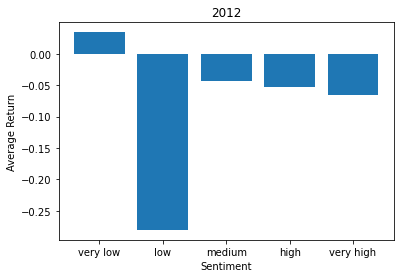

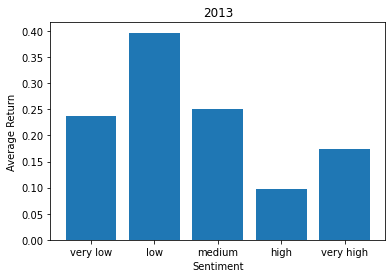

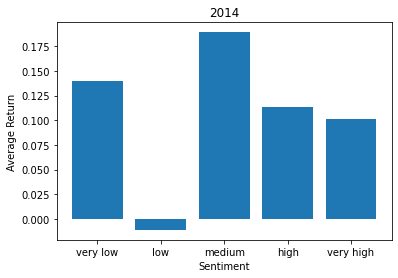

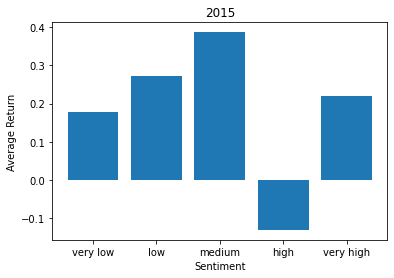

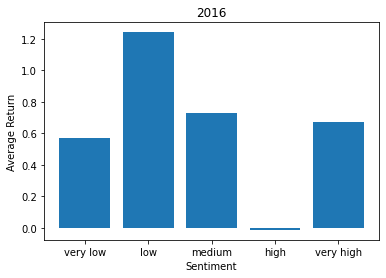

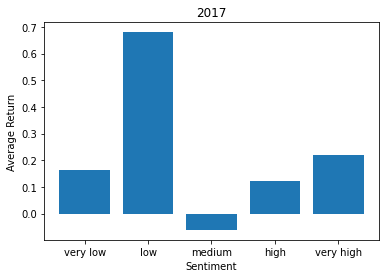

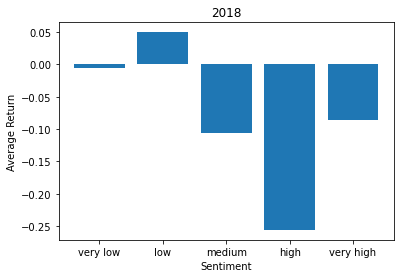

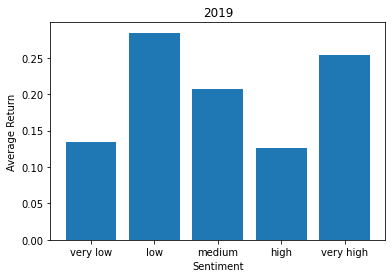

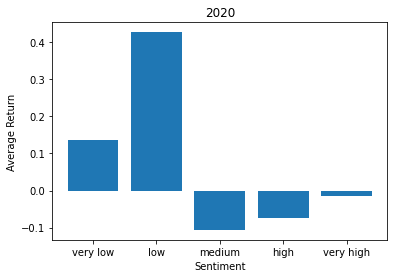

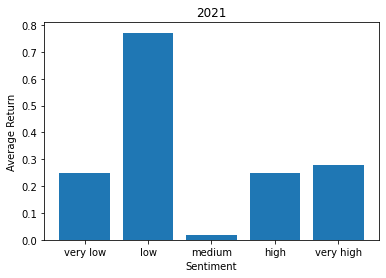

In [5]:
g= df.groupby(pd.Grouper(key='filingDate',freq='Y'))
x=[]
year=[]
label=['very low', 'low', 'medium', 'high', 'very high']
for t in g:
    df1=t[1]
    df_vlow= df1[df1['tone']>df1['tone'].quantile(0.1)]
    df_low=df1[(df1['tone']>df1['tone'].quantile(0.1)) & (df1['tone']<df1['tone'].quantile(0.3))]
    df_medium=df1[(df1['tone']>df1['tone'].quantile(0.3)) & (df1['tone']<df1['tone'].quantile(0.7))]
    df_high=df1[(df1['tone']>df1['tone'].quantile(0.7)) & (df1['tone']<df1['tone'].quantile(0.9))]
    df_vhigh= df1[df1['tone']<df1['tone'].quantile(0.9)]
    bars=np.array([df_vlow['abnormal_return'].mean(),df_low['abnormal_return'].mean(),df_medium['abnormal_return'].mean(), df_high['abnormal_return'].mean(),df_vhigh['abnormal_return'].mean()])*100
    x.append(bars)
    year.append(t[0].year)
def plots(x, label):
    figs={}
    axs={}
    for idx,plot in enumerate(x):
        figs[idx]=plt.figure()
        axs[idx]=figs[idx].add_subplot(111)
        axs[idx].bar(label,plot)
    return figs, axs  


figs, axs = plots(x,label)
for i, y in enumerate(year):
    axs[i].set_title(y)
    axs[i].set_xlabel('Sentiment')
    axs[i].set_ylabel('Average Return')


Tone mean: -0.3903317957153167


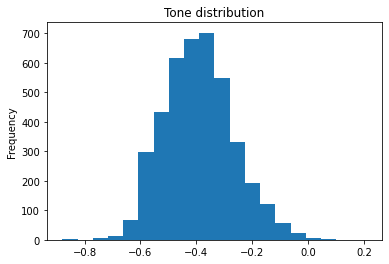

In [6]:
df_tone= df.sort_values('tone', ascending=True)
df['tone'].plot.hist(bins=20, xlabel="Tone", title="Tone distribution")
print("Tone mean:", df['tone'].mean())

<AxesSubplot:title={'center':'% negative distribution'}, ylabel='Frequency'>

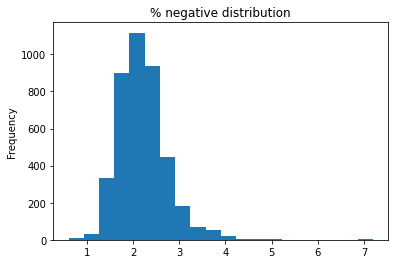

In [7]:
df['% negative'].plot.hist(bins=20, title='% negative distribution', xlabel="Tone")

<AxesSubplot:title={'center':'change dirstribution'}, ylabel='Frequency'>

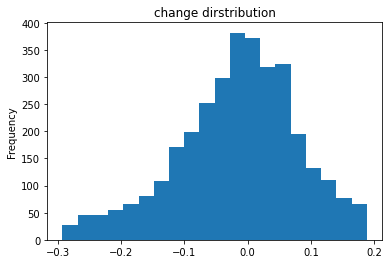

In [8]:
from scipy import stats
df_change=df.dropna(subset=['change'])

q_low = df_change["change"].quantile(0.05)
q_hi  = df_change["change"].quantile(0.95)
df_change = df_change[(df_change["change"] < q_hi) & (df_change["change"] > q_low)]
df_change['change'].plot.hist(bins=20, title='change dirstribution')



(1520, 7)
0.061363393259543056


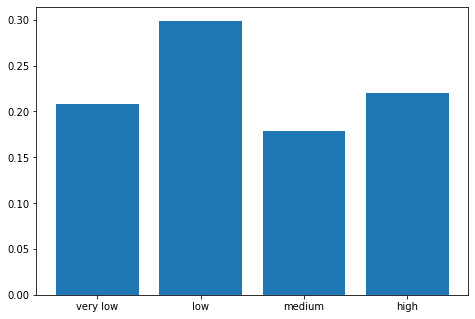

In [9]:
df_vlow= df_change[df_change['change']<-0.2]
df_low=df_change[(df_change['change']>-0.2) & (df_change['change']<0)]
df_medium=df_change[(df_change['change']>0) & (df_change['change']<0.2)]
df_high=df_change[(df_change['change']>df_change['change'].quantile(0.7)) & (df_change['change']<df_change['change'].quantile(0.9))]
df_vhigh= df_change[df_change['change']>0.2]
print(df_medium.shape)
print(df_change['change'].quantile(0.8))
bars=np.array([df_vlow['abnormal_return'].mean(),df_low['abnormal_return'].mean(),df_medium['abnormal_return'].mean(), df_high['abnormal_return'].mean(),df_vhigh['abnormal_return'].mean()])*100
label=['very low', 'low', 'medium', 'high', 'very high']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(label,bars)
plt.show()

<AxesSubplot:title={'center':'change dirstribution'}, ylabel='Frequency'>

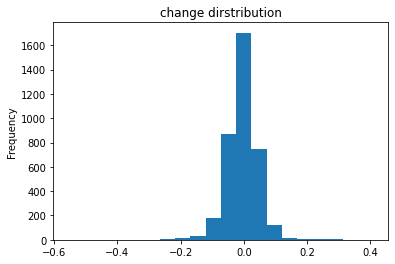

In [10]:
df_change_abs=df.dropna(subset=['change_abs'])

q_low = df_change_abs["change_abs"].quantile(0.05)
q_hi  = df_change_abs["change_abs"].quantile(0.95)
df_change = df_change_abs[(df_change_abs["change_abs"] < q_hi) & (df_change_abs["change_abs"] > q_low)]
df_change_abs['change_abs'].plot.hist(bins=20, title='change dirstribution')

(1545, 7)
0.0697855497209174


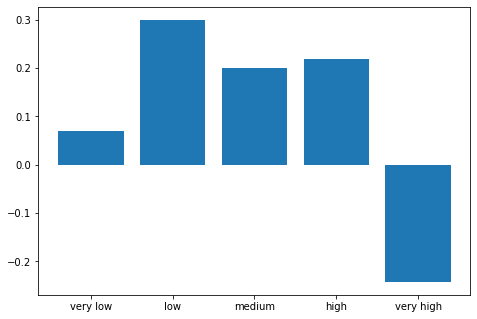

In [11]:
df_change=df_change_abs
df_vlow= df_change[df_change['change']<-0.2]
df_low=df_change[(df_change['change']>-0.2) & (df_change['change']<0)]
df_medium=df_change[(df_change['change']>0) & (df_change['change']<0.2)]
df_high=df_change[(df_change['change']>df_change['change'].quantile(0.7)) & (df_change['change']<df_change['change'].quantile(0.9))]
df_vhigh= df_change[df_change['change']>0.2]
print(df_medium.shape)
print(df_change['change'].quantile(0.8))
bars=np.array([df_vlow['abnormal_return'].mean(),df_low['abnormal_return'].mean(),df_medium['abnormal_return'].mean(), df_high['abnormal_return'].mean(),df_vhigh['abnormal_return'].mean()])*100
label=['very low', 'low', 'medium', 'high', 'very high']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(label,bars)
plt.show()

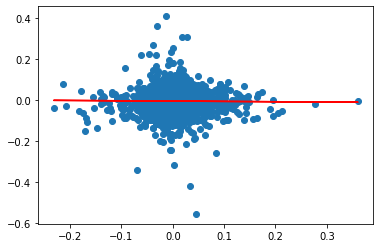

In [14]:
X = df_change.loc[:, 'abnormal_return'].values.reshape(-1, 1)  # iloc[:, 1] is the column of X
Y = df_change.loc[:, 'change_abs'].values.reshape(-1, 1)  # df.iloc[:, 4] is the column of Y
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.xlabel='abnormal return'
plt.ylabel='change_abs'
plt.plot(X, Y_pred, color='red')
plt.show()